In [1]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import parallel_backend
from timeit import default_timer as timer
from LoadData import LoadData


TESTING = True
DECISION_TREE = False
SUPPORT_VECTOR = True
NEURAL_NET = False
K_NEAREST = False
BOOSTING = False
NORMALIZE_DATA = False
USE_PCA = True
DataSetName = "Fashion-MNIST"


In [2]:
cwd = pathlib.Path().absolute()
if DataSetName == "MNIST":
    training_data_path = "{}/mnist-train-data.csv".format(cwd)
    testing_data_path = "{}/mnist-test-data.csv".format(cwd)
else:
    training_data_path = "{}/fashion-mnist-train-data.csv".format(cwd)
    testing_data_path = "{}/fashion-mnist-test-data.csv".format(cwd)


with parallel_backend('threading'):
    training_labels, training_data, _ = LoadData(training_data_path, normalize=NORMALIZE_DATA)
    testing_labels, testing_data, _ = LoadData(testing_data_path, normalize=NORMALIZE_DATA)

Scaler = StandardScaler().fit(training_data)
        
training_data = Scaler.transform(training_data)
testing_data = Scaler.transform(testing_data)

Attempting to load: fashion-mnist-train-data.csv

Loading Complete
Data Statistics: 
   Number of Entries: 60000 
   Shape of Entry: (785,)

Attempting to load: fashion-mnist-test-data.csv

Loading Complete
Data Statistics: 
   Number of Entries: 10000 
   Shape of Entry: (785,)



In [3]:
"""
TRAINING TIME

"""

'\nTRAINING TIME\n\n'

In [6]:
classifier_list = []
runtime = [0.0]
accuracy = [0.0]

In [7]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [9]:
clf = HistGradientBoostingClassifier(max_depth=3)
clf.fit(training_data[:int((60000 * 0.1)), :], training_labels[:int((60000 * 0.1))])

HistGradientBoostingClassifier(l2_regularization=0.0, learning_rate=0.1,
                               loss='auto', max_bins=255, max_depth=3,
                               max_iter=100, max_leaf_nodes=31,
                               min_samples_leaf=20, n_iter_no_change=None,
                               random_state=None, scoring=None, tol=1e-07,
                               validation_fraction=0.1, verbose=0,
                               warm_start=False)

In [19]:
clf.validation_score_


array([], dtype=float64)

In [15]:
with parallel_backend('threading'):
    clf = HistGradientBoostingClassifier(max_depth=3)
#     clf = GradientBoostingClassifier(n_estimators=50, max_depth=3, verbose=3, learning_rate=0.1)
    for i in range(1, 11, 1):
        print("{} - Training Size: {}%".format("Boosted", (i * 10)))
        start_time = timer()
        with parallel_backend('threading'):
            clf.fit(training_data[:int((60000 * (0.1 * i))), :], training_labels[:int((60000 * (0.1 * i)))])
        end_time = timer()
        elapsed_time = end_time - start_time
        if i == 10:
                classifier_list.append(clf)
        print(elapsed_time)
        accuracy.append(clf.score(testing_data, testing_labels))
        runtime.append(elapsed_time)

Boosted - Training Size: 10%
21.604483000000002
Boosted - Training Size: 20%
31.8669589
Boosted - Training Size: 30%
42.5603127
Boosted - Training Size: 40%
44.755652
Boosted - Training Size: 50%
49.517676600000016
Boosted - Training Size: 60%
61.112667199999976
Boosted - Training Size: 70%
70.12403569999998
Boosted - Training Size: 80%
74.47678310000003
Boosted - Training Size: 90%
80.6597797
Boosted - Training Size: 100%
84.35767729999998


In [16]:
print(accuracy)

[0.0, 0.86, 0.8714, 0.8787, 0.8807, 0.8646, 0.8828, 0.885, 0.8858, 0.8844, 0.8854]


In [17]:
accuracy = np.asarray(accuracy)
runtime = np.asarray(runtime)

In [18]:
accuracy.tofile('boosted_accuracy_{}.csv'.format(DataSetName),sep=',',format='%.3f')
runtime.tofile('boosted_runtime_{}.csv'.format(DataSetName),sep=',',format='%.3f')

TESTING
[[848   2  10  27   1   1 100   0  11   0]
 [  2 982   1  10   2   1   2   0   0   0]
 [  9   0 802  12  99   0  67   0  11   0]
 [ 23  11  11 909  27   0  19   0   0   0]
 [  1   0  59  26 854   0  57   0   3   0]
 [  2   1   0   0   0 948   0  35   1  13]
 [162   2  90  25  67   0 643   0  11   0]
 [  0   0   0   0   0  10   0 945   1  44]
 [  4   2   8   2   1   3  12   2 965   1]
 [  0   0   0   0   0   1   1  37   3 958]]


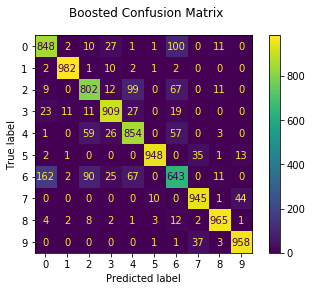

In [19]:
for i in range(len(classifier_list)):
    disp = plot_confusion_matrix(classifier_list[i], testing_data, testing_labels, values_format=".4g")
    disp.figure_.suptitle("{} Confusion Matrix".format("Boosted"))
    print("TESTING")
    print(disp.confusion_matrix)
    plt.savefig("{}_ConfusionMatrix_{}.png".format("Boosted", DataSetName))

In [20]:
"""
Results

"""

'\nResults\n\n'

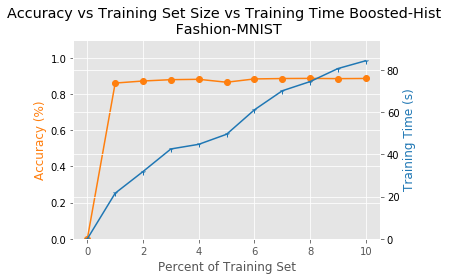

In [21]:
colors = ["tab:orange", "tab:blue", "tab:green", "tab:red"]

run = runtime
acc = accuracy


with plt.style.context('ggplot'):
    fig0, ax0 = plt.subplots()
    ax0.set_xlabel("Percent of Training Set")
    ax0.set_ylabel("Accuracy (%)", color='tab:orange')
    ax0.set_title("Accuracy vs Training Set Size vs Training Time {} \n {}".format("Boosted-Hist", DataSetName))
    ax0.tick_params(axis='y', labelcolor="black")
    ax0.set_ylim(0, 1.1)
    ax3 = ax0.twinx()
    ax3.set_ylabel("Training Time (s)", color="tab:blue")
    ax3.set_ylim(0, max(max(runtime), max(runtime)) + 10)
    ax3.tick_params(axis='y', labelcolor="black")
    for i in range(1):        
        ax0.plot([i for i in range(11)], acc, colors[i], marker='o', label="Boosted-Hist Accuracy")
        ax3.plot([i for i in range(11)], run, colors[i+1], marker="1", label="{} training-time".format("Boosted-Hist Training Time"))
    fig0.tight_layout()
    directory = "{}/Training_{}_{}_Hist_Set_Size_Impact_vs_Training_Time.png".format(cwd, "Boosted", DataSetName)
    plt.savefig(directory)
